In [16]:
"""
EXERCISE

Techniques used:
- read_csv
- unique()
- .map()
- .value_counts()
- Boolean Indexing
- Data cleaning
- GroupBy
- .plot()
"""

'\nEXERCISE\n\nTechniques used:\n- read_csv\n- unique()\n- .map()\n- .value_counts()\n- Boolean Indexing\n- Data cleaning\n- GroupBy\n- .plot()\n'

In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# 2012 election donation dataset
fec = pd.read_csv('data/2012-election.csv', low_memory=False)

# Inspect random row
fec.ix[123]

cmte_id                         C00410118
cand_id                         P20002978
cand_nm                Bachmann, Michelle
contbr_nm                 RAINEY, PATRICK
contbr_city                 WINTER GARDEN
contbr_st                              FL
contbr_zip                      347771599
contbr_employer      INTL TRADING COMPANY
contbr_occupation                  BROKER
contb_receipt_amt                     250
contb_receipt_dt                20-JUN-11
receipt_desc                          NaN
memo_cd                               NaN
memo_text                             NaN
form_tp                             SA17A
file_num                           736166
Name: 123, dtype: object

In [19]:
candidates = fec.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [20]:
# Map candidates to parties
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [21]:
# Add party column to dataframe
fec['party'] = fec.cand_nm.map(parties)

In [22]:
# How many individual donations by party
fec['party'].value_counts()

Democrat      593746
Republican    403430
dtype: int64

In [23]:
# Dataset include refunds (negative contributions)
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
dtype: int64

In [24]:
# Simplify dataset to just positive contributions and Barack Obama, and Mitt Romney
data = fec[fec.contb_receipt_amt > 0]
nominees_data = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [25]:
# Donation Stats by Occupation
data.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
dtype: int64

In [28]:
# Clean data
occupation_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

# If no mapping, pass through original value
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)

employer_map = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
}
f = lambda x: employer_map.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)


In [32]:
by_occupation = data.pivot_table('contb_receipt_amt',
                                 index='contbr_occupation',
                                 columns='party', aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN
'MIS MANAGER,NaN,177.60
(RETIRED),NaN,250.00
-,5000,2114.80
--,NaN,75.00


In [34]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7214482.230000
CEO,2074974.79,3862590.520000
CONSULTANT,2459912.71,2434349.400000
ENGINEER,951525.55,1802248.700000
EXECUTIVE,1355161.05,3964650.090000
HOMEMAKER,4248875.80,12715782.760000
INVESTOR,884133.00,2295168.920000
LAWYER,3160478.87,327224.320000
MANAGER,762883.22,1394467.370000


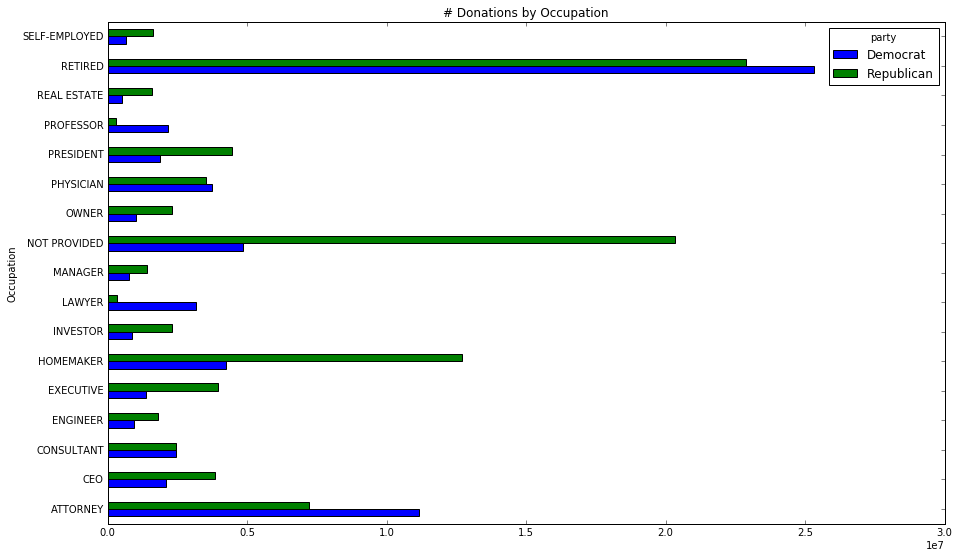

In [39]:
# We can quickly visualize this with a barchart
ax = over_2mm.plot(kind='barh', figsize=(15,9), title="# Donations by Occupation")
ax.set_ylabel('Occupation')

In [40]:
# Get top donor occupations and companies for Obama and Romney
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.order(ascending=False)[:n]

In [41]:
grouped = nominees_data.groupby('cand_nm')

# Top 10 donors by occupation
grouped.apply(get_top_amounts, 'contbr_occupation', n=10)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25270507.23
               ATTORNEY                                  11126932.97
               INFORMATION REQUESTED                      4849801.96
               HOMEMAKER                                  4243394.30
               PHYSICIAN                                  3732387.44
               LAWYER                                     3159391.87
               CONSULTANT                                 2459812.71
               PROFESSOR                                  2163571.08
               CEO                                        2069784.79
               PRESIDENT                                  1878009.95
Romney, Mitt   RETIRED                                   11266949.23
               INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
               HOMEMAKER                                  8037250.86
               ATTORNEY                          

In [64]:
# Top 10 donors by employer
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22665902.20
               SELF-EMPLOYED                             17038455.96
               NOT EMPLOYED                               8584118.70
               INFORMATION REQUESTED                      5036178.37
               HOMEMAKER                                  2599987.04
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    11827237.12
               RETIRED                                   11264701.35
               HOMEMAKER                                  8037000.86
               SELF-EMPLOYED                     